# Explore here

It's recommended to use this notebook for exploration purposes.

For example: 

1. You could import the CSV generated by python into your notebook and explore it.
2. You could connect to your database using `pandas.read_sql` from this notebook and explore it.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# Vemos la distribucion de charges que es la variable objetivo

#Label encode categorical features

from sklearn.preprocessing import LabelEncoder
# Vemos para la variable sexo que en este caso es sex
le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)
# Vemos para la variable fumador que es fumador o no
# en este caso se llama smoker 
le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)
# Vemos para la variable region
# en este caso se llama region
le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)

In [7]:
# Vamos a ver que tanta correlacion tienen las variables o features con la variable objetivo charges

df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

Aca vemos como una alta correlacion con la variable smoker

/tmp/ipykernel_2081/3206846581.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),


<AxesSubplot:>

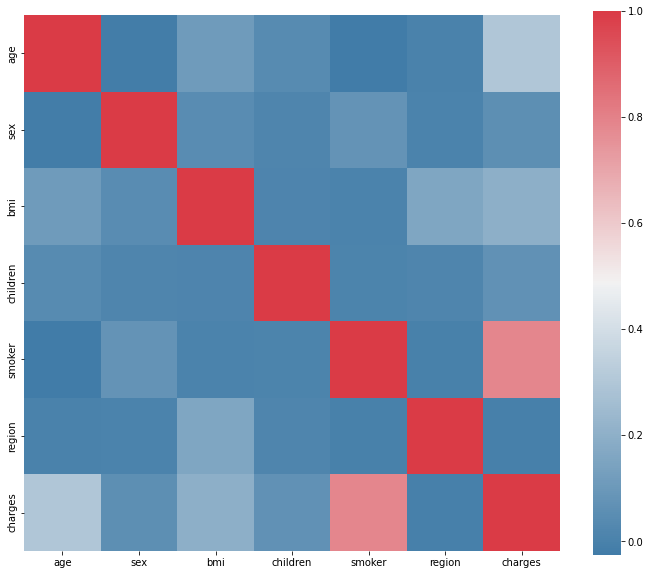

In [10]:
# Vamos a construir en heatmap o mapa de calor



f, ax = plt.subplots(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax)

Vemos que smoker tiene una alta correlacion con charges, mas de 0.7

<AxesSubplot:title={'center':'Box plot para los cargos en Hombres'}, xlabel='charges', ylabel='smoker'>

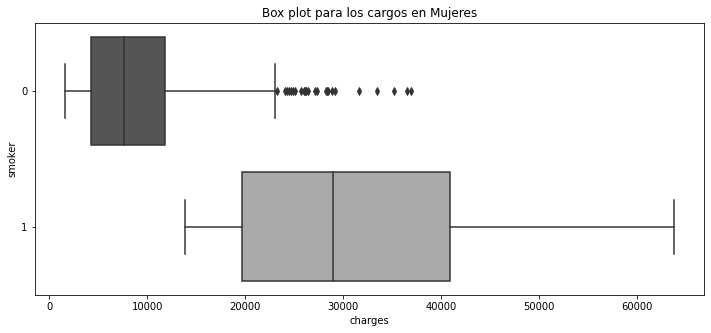

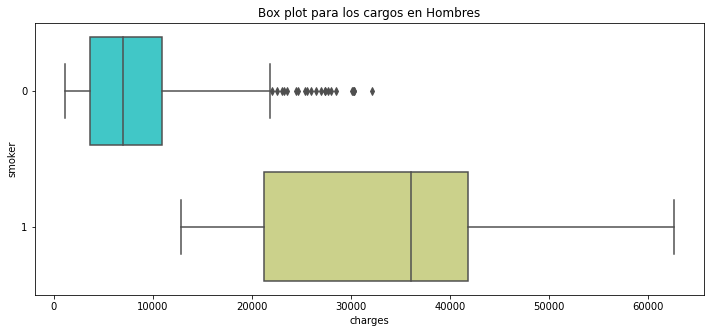

In [16]:
#Hacemos graficos de box plot, comparando las variables sex, charges y smoker

plt.figure(figsize=(12,5))
plt.title("Box plot para los cargos en Mujeres")
sns.boxplot(y='smoker', x='charges', data =  df[(df.sex == 0)] , orient="h", palette = 'gray')

plt.figure(figsize=(12,5))
plt.title("Box plot para los cargos en Hombres")
sns.boxplot(y="smoker", x="charges", data =  df[(df.sex == 1)] , orient="h", palette = 'rainbow')

<AxesSubplot:title={'center':'Box plot para los de 18 años Fumadores'}, xlabel='charges', ylabel='smoker'>

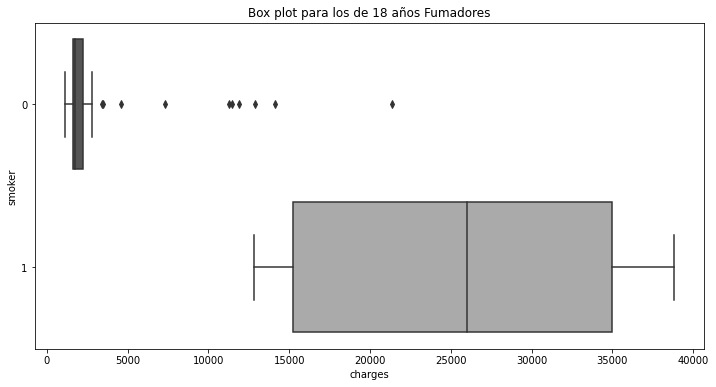

In [15]:
# Ahora vemos en un boxplot como afecta la edad en el precio del costo del seguro

plt.figure(figsize=(12,6))
plt.title("Box plot para los de 18 años Fumadores")
sns.boxplot(y="smoker", x="charges", data = df[(df.age == 18)] , orient="h", palette = 'gray')

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


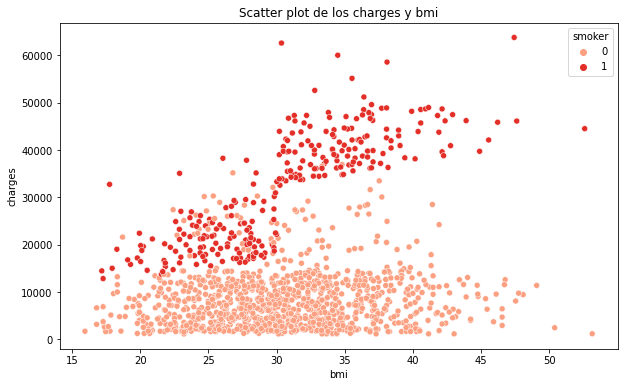

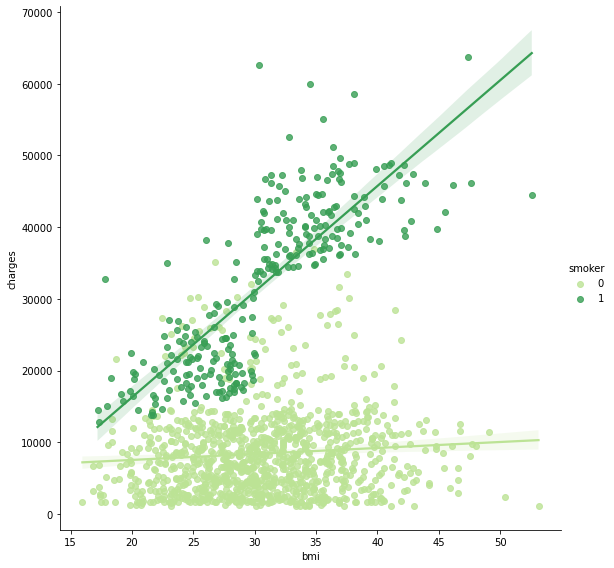

In [20]:
#Hacemos una  scatterplot de los charges vs bmi vs smoker

plt.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=df,palette='Reds',hue='smoker')
ax.set_title('Scatter plot de los charges y bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=df, palette = 'YlGn', size = 8)

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


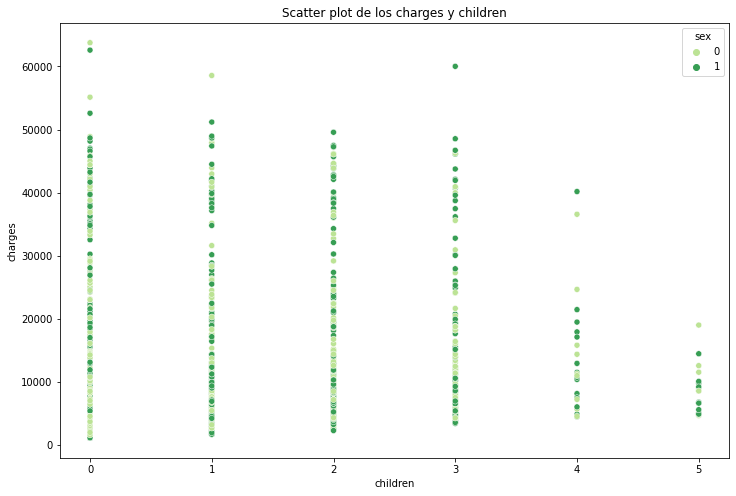

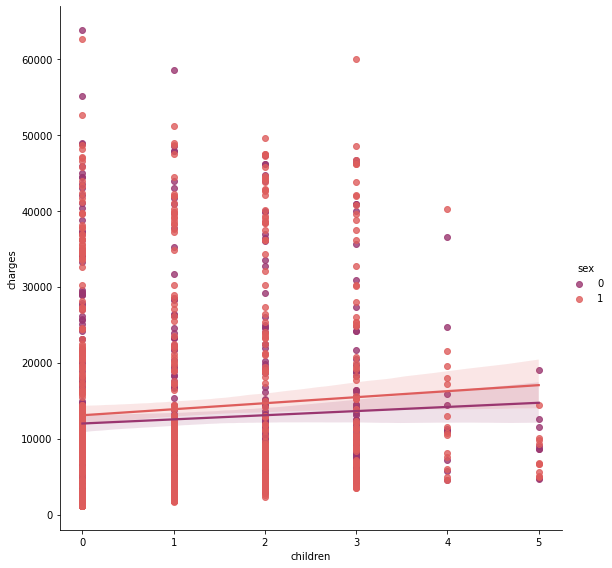

In [25]:
# Ahora nos fijamos si el numero de hijos afecta el costo del seguro charges

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x='children',y='charges',data=df,palette='YlGn',hue='sex')
ax.set_title('Scatter plot de los charges y children')

sns.lmplot(x="children", y="charges", hue="sex", data=df, palette = 'flare_r', size = 8)


In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [27]:
# Vamos a predecir el seguro, con la regresion lineal

x = df.drop(['charges'], axis = 1)
y = df.charges

X_train,X_test,y_train,y_test = train_test_split(x,y, random_state = 121)
lr = LinearRegression().fit(X_train,y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test,y_test))

0.7246385794881208


In [28]:
# Ahora borramos las regiones y aplicamos el polinomial

x = df.drop(['charges','region'], axis = 1)
y = df.charges



quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,y_train,y_test = train_test_split(x_quad,y, random_state = 121)

plr = LinearRegression().fit(X_train,y_train)

y_train_pred = plr.predict(X_train)
y_test_pred = plr.predict(X_test)

print(plr.score(X_test,y_test))

0.8325729285370147


De esta forma mejora el resultado obtenido de 0.72 pasamos a un 0.83